In [1]:
# Importing Libraries
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [4]:
#just french jobs
df_da_FR = df[(df['job_country'] == 'France') & (df['job_title_short'] == 'Data Analyst')]

In [11]:
df_plot = df_da_FR['job_location'].value_counts().head(10).to_frame()

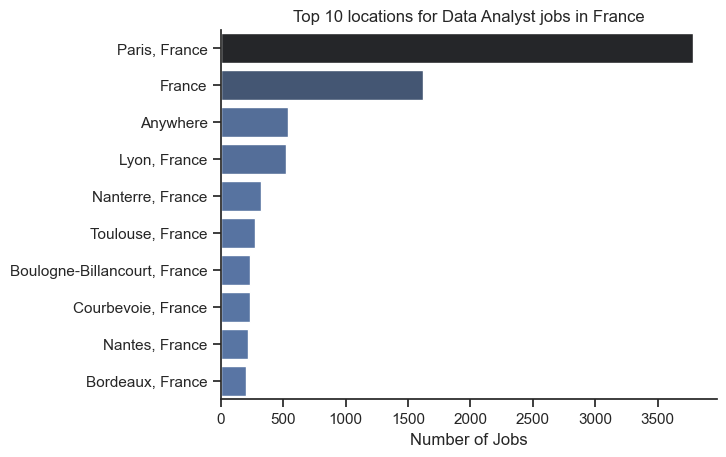

In [29]:
sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x= 'count', y= 'job_location', palette='dark:b_r', hue='count', legend=False)
sns.despine()
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.title('Top 10 locations for Data Analyst jobs in France')
plt.show()

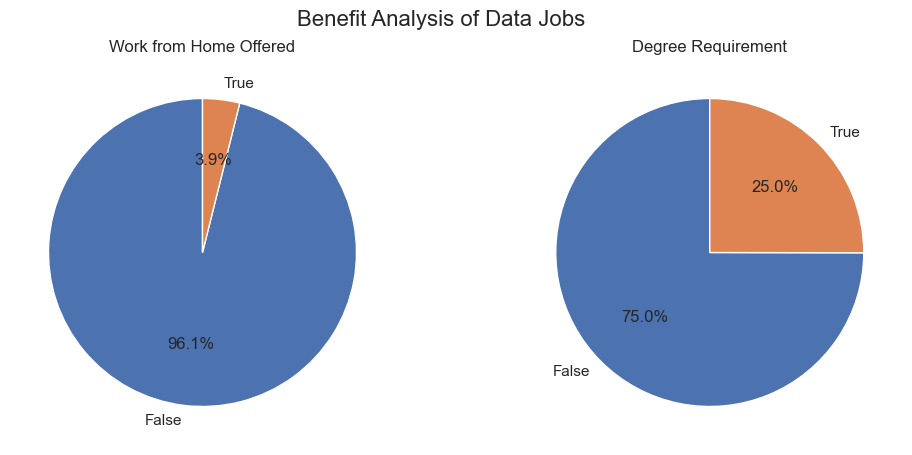

In [34]:
# rewrite the above with a for loop
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    #'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 2)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    values = df_da_FR[column].value_counts()
    ax[i].pie(values, labels=values.index.astype(str), autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

*Top companies in France for DA jobs*

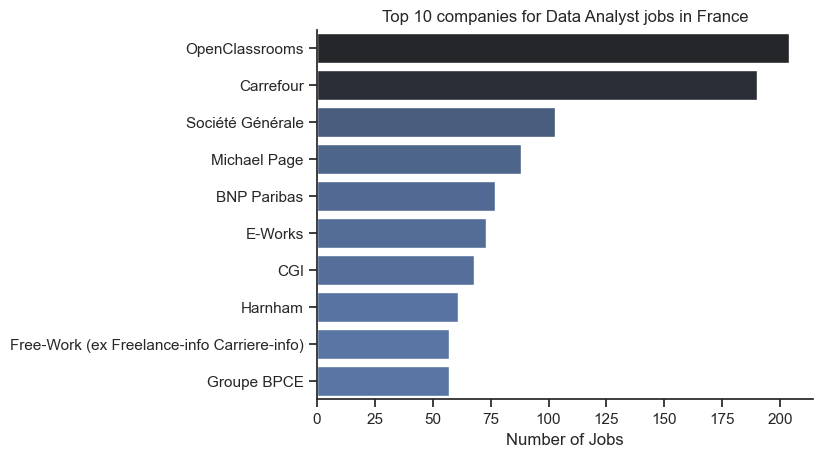

In [35]:
#
df_plot = df_da_FR['company_name'].value_counts().head(10).to_frame()

sns.set_theme(style='ticks')
sns.barplot(data=df_plot, x= 'count', y= 'company_name', palette='dark:b_r', hue='count', legend=False)
sns.despine()
plt.ylabel('')
plt.xlabel('Number of Jobs')
plt.title('Top 10 companies for Data Analyst jobs in France')
plt.show()